> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

With parameters  :
- $D_u = 0.001, \quad D_v=0.1$.
- $A = 1.0$.
- $B = 1.21$.

In [1]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/TINN/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Brusselator

from matplotlib import pyplot as plt


In [2]:
from collections import namedtuple
Simulation = namedtuple(
    "Simulation",
    [
        "name",
        "n",
        "L",
        "Ds",
        "dt",
        "t_start",
        "t_end",
        "t_steps",
        "dt_arr",
        "parameters",
        "steady_state_func",
        "perturbation_size",
        "kinetic_func",
        "tol",
        "sample_parameters",
        "sample_parameters_num",
        "sample_parameters_std",
        "same_init",
        "c0",
    ],
    defaults=[
        "Brusselator",
        (128, 128),
        (2, 2),
        (0.002, 0.04),
        # 0.05, 0, 128, 64,
        0.001,
        0,
        128,
        128 + 1,
        None,
        {"A": 2, "B": 3},
        None,
        0.1,
        None,
        1e-3,
        True,
        30,
        (0.5, 0.5),
        False,
        None,
    ],
)



In [18]:
import os
data_path = os.path.abspath("../../test/outputs_Brusselator_100_by_100/Brusselator_1/Brusselator_1.npy")
with open(data_path, 'rb') as f:
    data = np.load(f)

In [19]:
with open(os.path.abspath("../../test/outputs_Brusselator_100_by_100/Brusselator_1/simulation.txt"), "r") as f:
    simulation = eval(f.read())

In [20]:
tuple(simulation.parameters.values())

(2, 3)

In [22]:

#c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0 = data[..., 0]


#f_args = tuple(simulation.parameters.values())
f_args = (1.3994780827544253, 2.7047523447071771)
t = np.linspace(simulation.t_start, simulation.t_end, simulation.t_steps)


sol = integrate(c0, t, simulation.dt, simulation.n, simulation.L, simulation.Ds, Brusselator, f_args)

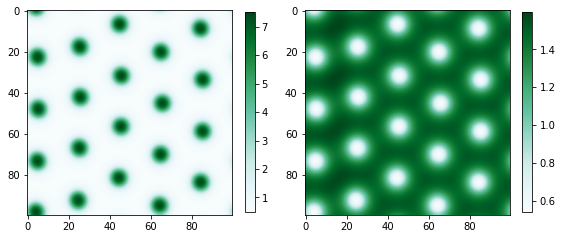

In [23]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index], cmap='BuGn', interpolation='gaussian')
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index], cmap='BuGn', interpolation='gaussian')
plt.colorbar(shrink=.75)
plt.tight_layout()
plt.show()

In [24]:
sol.shape

(2, 100, 100, 516)

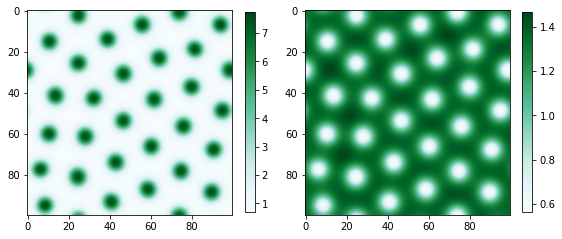

In [26]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(data[0,:,:, index], cmap='BuGn', interpolation='gaussian')
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(data[1,:,:, index], cmap='BuGn', interpolation='gaussian')
plt.colorbar(shrink=.75)
plt.tight_layout()
plt.show()

In [27]:
simulation.parameters

{'A': 2, 'B': 3}